# Research: Investigate the Dataset (TMDb Movie)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### In this research I will explore the TMDb  wich contain a data about the movies & I will try to answer this questions: 


<li> What is the most popular and profitable gener?
<li> Is the movie industry's profit increasing over the year? 
<li> Is there a relationship in populartiy and rating?

In [2]:
#Load your data and print out a few lines. Perform operations to inspect data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px # for visualization 
import plotly.offline as py 
import plotly.graph_objs as go 
from plotly.figure_factory import create_table # for creating nice table 
# types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

#### Expplore the dataset: with (Head, Shape & Info Function)

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Is there any duplicates?

In [6]:
sum(df.duplicated())

1

> The answer is yes there is one.

### Data Cleaning 

#### First let's drop the duplicate:

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
# making sure ther is no duplicates
sum(df.duplicated())

0

#### Drop the columns that i don't want  (Director,  runtime,  release_date,  cast imdb_id,  homepage tagline,  keywords & overview)

In [9]:
df=df.drop([ 'director', 'runtime','release_date','cast','imdb_id','homepage','tagline','keywords','overview'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   genres                10842 non-null  object 
 6   production_companies  9835 non-null   object 
 7   vote_count            10865 non-null  int64  
 8   vote_average          10865 non-null  float64
 9   release_year          10865 non-null  int64  
 10  budget_adj            10865 non-null  float64
 11  revenue_adj           10865 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


In [10]:
## how many null values
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
## filling the null with 'unknown' 
df.fillna('unknown', inplace=True)
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   genres                10865 non-null  object 
 6   production_companies  10865 non-null  object 
 7   vote_count            10865 non-null  int64  
 8   vote_average          10865 non-null  float64
 9   release_year          10865 non-null  int64  
 10  budget_adj            10865 non-null  float64
 11  revenue_adj           10865 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


#### Now the Data are ready for answering the questions.

<a id='eda'></a>
## Exploratory Data Analysis



### Let's have a General look:

In [13]:
df.describe()

,id,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### The budget & the  runtime have 0 values!! 

In [14]:
#check the budget that have 0 values
df[df['budget']==0]

,id,popularity,budget,revenue,original_title,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,3.927333,0,29355203,Mr. Holmes,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,425,6.4,2015,0.0,2.700677e+07
36,339527,3.358321,0,22354572,Solace,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,474,6.2,2015,0.0,2.056620e+07
72,284289,2.272044,0,45895,Beyond the Reach,Thriller,Furthur Films,81,5.5,2015,0.0,4.222338e+04
74,347096,2.165433,0,0,Mythica: The Darkspore,Action|Adventure|Fantasy,Arrowstorm Entertainment,27,5.1,2015,0.0,0.000000e+00
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Comedy|Drama,Indian Paintbrush,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,0.087034,0,0,Carry On Screaming!,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,13,7.0,1966,0.0,0.000000e+00
10861,21,0.080598,0,0,The Endless Summer,Documentary,Bruce Brown Films,11,7.4,1966,0.0,0.000000e+00
10862,20379,0.065543,0,0,Grand Prix,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,0.0,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Mystery|Comedy,Mosfilm,11,6.5,1966,0.0,0.000000e+00


In [15]:
df.query('budget==0').count()

id                      5696
popularity              5696
budget                  5696
revenue                 5696
original_title          5696
genres                  5696
production_companies    5696
vote_count              5696
vote_average            5696
release_year            5696
budget_adj              5696
revenue_adj             5696
dtype: int64

 #### Droping the 0 values:

In [16]:
df.drop(df[df.budget==0].index, inplace=True)
df.query('budget==0').count().sum()

0

In [17]:
df.describe()

,id,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5169.000000,5169.000000,5.169000e+03,5.169000e+03,5169.000000,5169.000000,5169.000000,5.169000e+03,5.169000e+03
mean,45513.725479,0.992400,3.073958e+07,8.029101e+07,408.651190,6.032308,2001.251112,3.688907e+07,1.021953e+08
std,72730.345078,1.329262,3.890441e+07,1.594865e+08,788.314712,0.884125,11.776443,4.196096e+07,1.959194e+08
min,5.000000,0.001117,1.000000e+00,0.000000e+00,10.000000,1.500000,1960.000000,9.210911e-01,0.000000e+00
25%,8840.000000,0.347958,6.000000e+06,0.000000e+00,35.000000,5.500000,1996.000000,8.102293e+06,0.000000e+00
50%,13008.000000,0.624024,1.700000e+07,2.100156e+07,122.000000,6.100000,2005.000000,2.271505e+07,2.863167e+07
75%,44943.000000,1.152417,4.000000e+07,8.945676e+07,402.000000,6.600000,2010.000000,5.008384e+07,1.134196e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


#### Another look with hist, scatter figures 

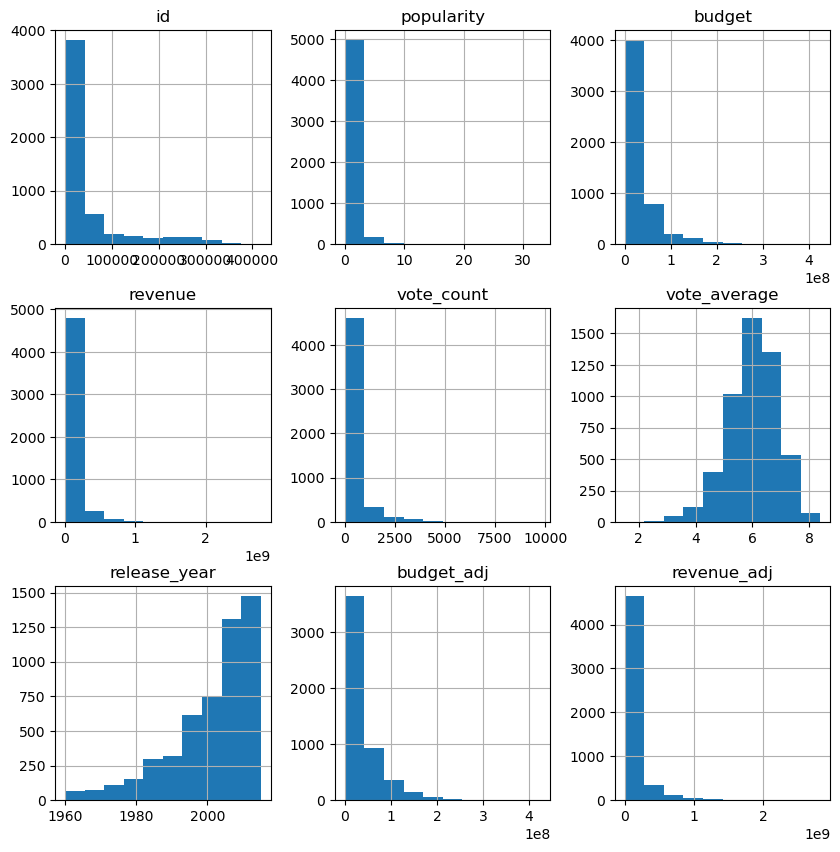

In [18]:
df.hist(figsize = (10, 10));

### Question 1 .1 (What is the most popular gener? )

In [19]:
df=df.assign(genres=df.genres.str.split('|')).explode('genres')
df.head()

,id,popularity,budget,revenue,original_title,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Adventure,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


In [20]:
df_geners_popularity=df.groupby(['genres'],as_index=False)['popularity'].mean().sort_values(by=['popularity'])
df_geners_popularity

,genres,popularity
9,Foreign,0.195843
5,Documentary,0.258422
20,unknown,0.344172
16,TV Movie,0.422035
11,Horror,0.650551
10,History,0.795423
12,Music,0.799455
14,Romance,0.842563
6,Drama,0.859592
3,Comedy,0.882567


In [21]:
x1=df_geners_popularity['genres']
y1=df_geners_popularity['popularity']

Text(0.5, 1.0, 'Top Popularity by geners')

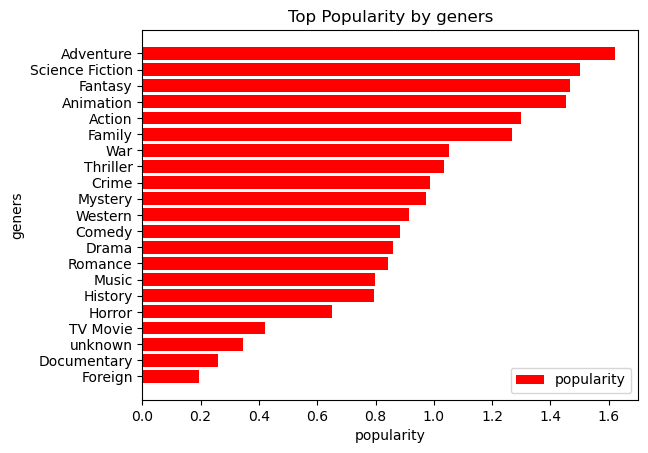

In [28]:
plt.barh(x1,y1,color="red",label='popularity')
plt.legend()
plt.xlabel('popularity')
plt.ylabel('geners')
plt.title('Top Popularity by geners')

### Question 1.2  (What is the most profitable gener?)

In [23]:
df_geners_profit=df.groupby(['genres'],as_index=False)['revenue_adj'].sum().sort_values(by=['revenue_adj'])
df_geners_profit

,genres,revenue_adj
20,unknown,0.000000e+00
16,TV Movie,5.838910e+07
9,Foreign,1.655391e+08
5,Documentary,8.682158e+08
19,Western,7.055088e+09
10,History,1.569436e+10
12,Music,1.830098e+10
18,War,1.855188e+10
11,Horror,3.769124e+10
13,Mystery,3.908563e+10


In [24]:
x2=df_geners_profit['genres']
y2=df_geners_profit['revenue_adj']

Text(0.5, 1.0, 'Top Profits by geners')

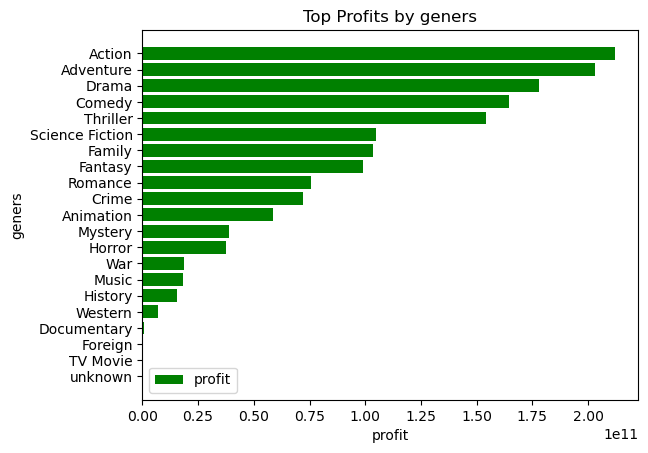

In [27]:
plt.barh(x2,y2,color="green",label='profit')
plt.legend()
plt.xlabel('profit')
plt.ylabel('geners')
plt.title('Top Profits by geners')

### Question 2 (Is the movie industry's profit increasing over the year?)

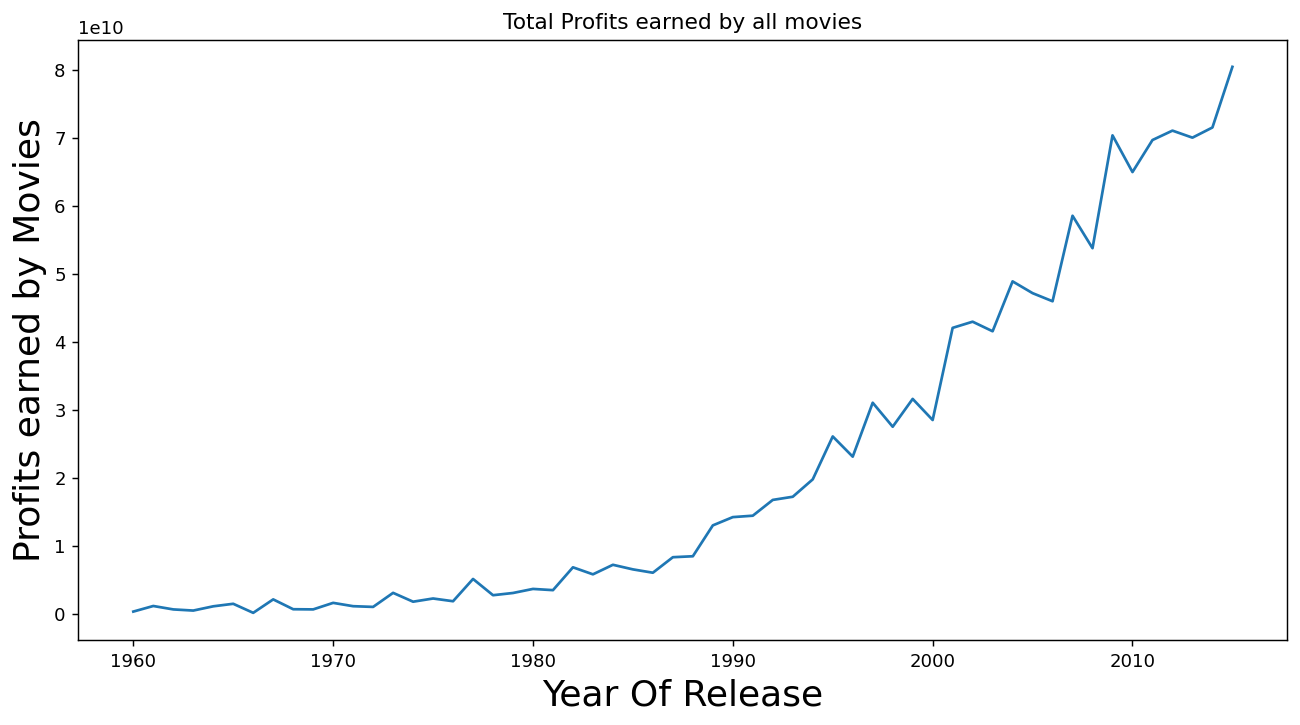

In [26]:
# I will be use Line plot for this
#Since i want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

profits_year = df.groupby('release_year')['revenue'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Year Of Release', fontsize = 20)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 20)
#Title of The line plot
plt.title('Total Profits earned by all movies')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

### Question 3 (Is there a relationship in populartiy and rating?)

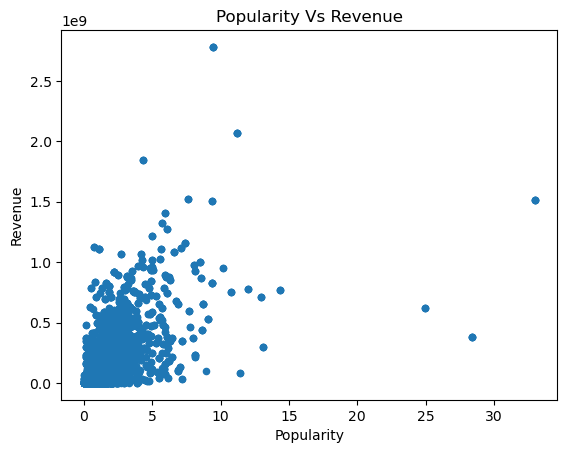

In [48]:
# Scatter plot of Revenue vs Popularity
df.plot(x='popularity',y='revenue',kind='scatter')
plt.title('Popularity Vs Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue');

<a id='conclusions'></a>
## Conclusions


> Quetion 1 answer is: 1.1:The most popular genre is advanture.  1.2 The most profitable genre is action.

> Quetion 2 answer is: Yes, the profit of movies industry is increasing over the year.

> Quetion 3 answer is: Yes the Revenue is increasing with increase in Popularity.

### Limitations:

> The data has a lot of limitation such as the null in the production_companies column, that i have to change it with 'Unknowm'.
  And the zero values in budjet and revenue and i drop them.